In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [34]:
df1 = pd.read_csv('e-shop clothing 2008.csv', sep=";")

In [35]:
df1.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [37]:
df1.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [39]:
df1 = df1.drop('page 2 (clothing model)', axis=1)

In [49]:
df1 = df1.rename(columns={"price 2": "NewPrice"})

In [50]:
def converter(NewPrice):
    if NewPrice=='2':
        return 1
    else:
        return 0

In [51]:
df1['Cluster'] = df1['NewPrice'].apply(converter)

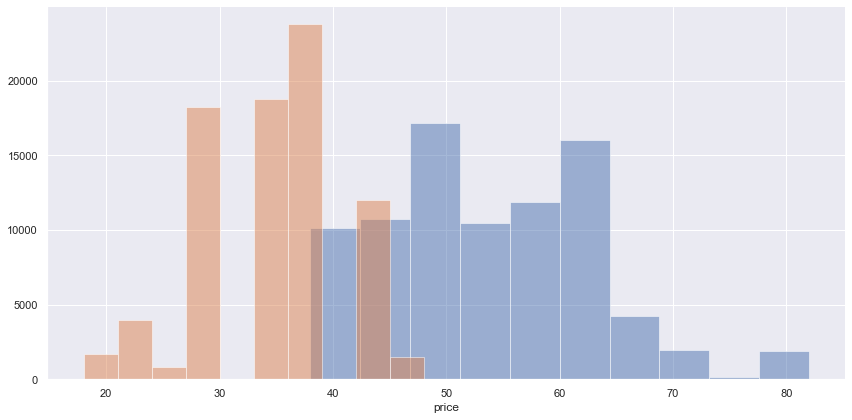

In [53]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df1, hue='NewPrice', height=6, aspect=2)
g = g.map(plt.hist, 'price', bins=10, alpha=0.5)

In [19]:
from sklearn.cluster import KMeans

In [66]:
X = df1.drop(['NewPrice'], axis=1)
kmean = KMeans(n_clusters=2)
kmean.fit(X)

KMeans(n_clusters=2)

In [67]:
kmean.cluster_centers_

array([[2.00800000e+03, 6.77228049e+00, 1.43101137e+01, 9.97062235e+00,
        2.73527027e+01, 1.82131066e+04, 2.41659849e+00, 6.11432374e+00,
        3.23592474e+00, 1.26288477e+00, 4.39189734e+01, 1.72171821e+00,
        0.00000000e+00],
       [2.00800000e+03, 4.42328448e+00, 1.47346934e+01, 9.66740054e+00,
        2.65605624e+01, 6.02715273e+03, 2.38540233e+00, 6.33871373e+00,
        3.28002393e+00, 1.25731379e+00, 4.36883757e+01, 1.69884535e+00,
        0.00000000e+00]])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print(classification_report(df1['NewPrice'], kmean.labels_))
'\n'
print(confusion_matrix(df1['NewPrice'], kmean.labels_))

c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.51      0.50      0.50     84695
           2       0.00      0.00      0.00     80779

    accuracy                           0.26    165474
   macro avg       0.17      0.17      0.17    165474
weighted avg       0.26      0.26      0.26    165474

[[    0     0     0]
 [42311 42384     0]
 [39510 41269     0]]
